# Liczby Fibonacciego - implementacja

Liczby Fibonacciego to ciąg liczb całkowitych określony następującą formułą rekurencyjną:

$F_0=0$ , $F_1 =1 $ and $F_{n+2} = F_{n+1}+F_{n}$ for $n\geq 0$

Ten ciąg znany jest od czasów średniowiecza i pojawia się w wielu nieoczekiwanych miejscach (np. w biologii, w problemach związanych z liczbą złotego podziału itd.). Liczba (stosunek) złotego podziału to $\frac{1+\sqrt{5}}{2}$ i może być przybliżona jako iloraz dwóch kolejnych liczb Fibonacciego.

W tym pliku korzystając z wiedzy zdobytej na temat ciągu i jego własności (formuły jawne, postać macierzowa i tożsamości), spróbujemy napisać implementację (kod w języku Python), który będzie wydajnie generował liczby Fibonacciego dla dużych wykładników.

In [1]:
%timeit fibonacci(10000) #szybkie sprawdzenie wydajności wbudowanej w SageMath procedury obliczania liczb Fibonacciego

6.7 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
def Fib1(n): #implementacja iteracyjna
    a=0
    b=1
    c=0
    for i in [1..n]:
        c=a+b
        a=b
        b=c
    
    return a

In [3]:
%timeit Fib1(10000) #wydajność naszej funkcji jest raczej kiepska w porównaniu z wbudowaną!

3.57 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Formuła Bineta

Liczby Fibonacciego mogą być wyrażone w terminach formuły Bineta, która podaje postać jawną kolejnych elementów ciągu Fibonacciego. Zaletą tej formuły jest niezależność postaci $n$-tej liczby Fibonacciego od jej poprzedników.

$F_{n}=\frac{1}{\sqrt{5}}\left( \left(\frac{1+\sqrt{5}}{2}\right)^{n}-\left(\frac{1-\sqrt{5}}{2}\right)^{n}\right)$

In [13]:
R.<x>=QQ[] #inicjalizujemy pierścień wielomianów o współczynnikach wymiernych (QQ) i zmiennej x
K.<phi>=NumberField(x^2-x-1) #inicjalizujemy ciało liczbowe Q(phi) określone przez wielomian x^2-x-1

In [2]:
R

Univariate Polynomial Ring in x over Rational Field

In [3]:
K

Number Field in phi with defining polynomial x^2 - x - 1

In [14]:
phi^2-phi-1

0

In [31]:
print((x^2-x-1).roots(K)) #SageMath może wygenerować listę pierwiastków wielomianu w zadanym ciele
print((x^2-5).roots(K))
print((x^2-7).roots(K)) # używaj print(...) zamiast print ... -> jesteśmy w Python 3.x!

[(phi, 1), (-phi + 1, 1)]
[(2*phi - 1, 1), (-2*phi + 1, 1)]
[]


In [16]:
alpha=phi
beta=1-phi
def BinetFib(n): #implementacja formuły Bineta
    return 1/(2*phi-1)*(alpha^n-beta^n)

In [19]:
[BinetFib(n)-Fib1(n) for n in [1..10]] #szybkie sprawdzenie zgodności obu funkcji

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
%timeit BinetFib(10000) #czasowa wydajność nowej procedury jest znacznie lepsza niż poprzedniej formuły iteracyjnej!

52.8 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Numeryczna formuła Bineta

W formule Bineta wyrażenia symboliczne możemy zamienić na ich numeryczne odpowiedniki. Sprawdzimy jak to wpłynie na wydajność generowania liczb Fibonacciego.

In [26]:
embed1=K.embeddings(RealField(10000)) #lista zanurzeń ciała K w liczby rzeczywiste (są dwa)

In [30]:
embed1[0]((phi*2-1)^2)

5.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [25]:
1/phi^1000

-43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875*phi + 70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501

In [32]:
golden=embed1[1](phi) #generujemy wartości liczbowe naszych abstrakcyjnych wersji wyrażeń symbolicznych
goldenhat=embed1[0](phi)
sq5=sqrt(RealField(10000)(5))

In [33]:
def BinetNum(n): #numeryczna formuła Bineta
    return round(1/sq5*(golden^n-goldenhat^n))

In [34]:
[BinetNum(i)-Fib1(i) for i in [1..20]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
%timeit BinetNum(10000) #to jest wolniejsze niż poprzednia implementacja!

215 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
%timeit BinetFib(100)

12.6 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%timeit BinetNum(100)

116 µs ± 8.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [131]:
print goldenhat
print abs(goldenhat/sq5)
print abs(goldenhat^2/sq5)

-0.6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071013179523689427521948435305678300228785699782977834784587822891109762500302696156170025046433824377648610283831268330372429267526311653392473167111211588186385133162038400522216579128667529465490681131715993432359734949850904094762132229810172610705961164562990981629055520852479035240602017279974717534277759277862561943208275051312181562855122248093947123414517022373580577278616008688382952304592647878017889921990270776903895321968198615143780314997411069260886742962267575605231727775203536139

In [38]:
def BinetNum2(n): # możemy w drugim podejściu wykorzystać fakt, że drugi człon formuły z phihat jest co do moduły mniejszy od 1
    if (n <=1):
        return n
    else:
        if (n % 2 == 0):
            return floor(1/sq5*(golden^n))
        else:
            return ceil(1/sq5*(golden^n))

In [138]:
[i for i in [1..7200] if not (BinetNum2(i)==BinetFib(i))]

[7195, 7197, 7199]

In [39]:
%timeit BinetNum2(10000) #to jest szybsze niż BinetNum1, ale nadal wolniejsze niż wersja symboliczna

120 µs ± 7.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [150]:
def BinetNum3(n,prec): #implementacja pozwalająca zarządzać precyzją liczb
    sq5=sqrt(RealField(prec)(5))
    golden=(1+sq5)/2
    goldenhat=(1-sq5)/2
    if (n <=1):
        return n
    else:
        if (n % 2 == 0):
            return floor(1/sq5*(golden^n))
        else:
            return ceil(1/sq5*(golden^n))

In [156]:
%timeit BinetNum3(100,100)

The slowest run took 7.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.3 µs per loop


In [157]:
%timeit fibonacci(100)

The slowest run took 21.45 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.63 µs per loop


In [155]:
BinetNum3(100,100)-fibonacci(100)

0

In [158]:
%timeit BinetFib(100)

The slowest run took 7.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.2 µs per loop


In [170]:
%timeit BinetNum3(10000,7700)#z odpowiednio dobraną precyzją możemy uzyskać implementację szybszą niż symboliczna
                             #ale z drugiej strony potrzebujemy dostatecznej precyzji, aby wyniki były poprawne

1000 loops, best of 3: 224 µs per loop


In [160]:
%timeit fibonacci(10000)

The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.5 µs per loop


In [169]:
BinetNum3(10000,7700)-fibonacci(10000)

0

## Czy istnieje szybsza implementacja niż BinetNum?

In [179]:
m=matrix(2,2,[1,1,1,0]) #inicjalizujemy macierz o wymiarze dwa i współczynnikach 1,1,1,0
print m

[1 1]
[1 0]


In [180]:
[m^n-matrix(2,2,[fibonacci(n+1), fibonacci(n),fibonacci(n),fibonacci(n-1)]) for n in [0..10]] #ciekawa tożsamość

[
[0 0]  [0 0]  [0 0]  [0 0]  [0 0]  [0 0]  [0 0]  [0 0]  [0 0]  [0 0]
[0 0], [0 0], [0 0], [0 0], [0 0], [0 0], [0 0], [0 0], [0 0], [0 0],

[0 0]
[0 0]
]

**Ćwiczenie**

Udowodnij równość

$\left(\begin{array}{cc} 1 & 1 \\ 1 & 0 \end{array}\right)^n = \left(\begin{array}{cc} F_{n+1} & F_{n} \\ F_{n} & F_{n-1} \end{array}\right)$

### Szybkie potęgowanie

In [41]:
def pow_sq(x, n): #szybkie potęgowanie
    if n < 0:
        x = x^(-1)
        n = -n
    if n == 0:
        return x*(x^(-1))
    y = matrix(2,2,[1,0,0,1])
    while n > 1:
        if n % 2 == 0:
            x = x * x
            n = n / 2;
        else:
            y = x * y;
            x = x * x;
            n = (n - 1) / 2
    return x * y

In [42]:
m=matrix(2,2,[1,1,1,0]) #liczby Fibonacciego obliczane metodą macierzową
def FibMat(n):
    return pow_sq(m,n)[0][1]

In [43]:
%timeit FibMat(10000)

128 µs ± 7.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [198]:
%timeit BinetNum3(10000,10000)

1000 loops, best of 3: 358 µs per loop


In [44]:
%timeit fibonacci(10000)

7.66 µs ± 760 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [200]:
%timeit BinetFib(10000)

10000 loops, best of 3: 107 µs per loop


In [201]:
%timeit FibMat(50000)

1000 loops, best of 3: 751 µs per loop


In [203]:
%timeit fibonacci(50000)

10000 loops, best of 3: 109 µs per loop


In [204]:
%timeit BinetFib(50000) #dla dostatecznie dużych indeksów nasza implementacja macierzowa działa lepiej niż formuła Bineta

1000 loops, best of 3: 577 µs per loop


Aby dalej przyspieszyć działanie naszej procedury możemy wykorzystać dwie znane nam tożsamości:

$F(2k) = F(k)(2F(k+1)-F(k))$

$F(2k+1)=F(k+1)^2+F(k)^2$

In [45]:
matgen=matrix(2,2,[1,1,1,0]) #poprawiona wersja implementacji macierzowej
def FibMatv2(n):
    if n % 2 == 0:
        m= n/2
        S=pow_sq(matgen,m)
        Fk=S[0][1]
        FSk=S[0][0]
        return Fk*(2*FSk-Fk)
    else:
        m=(n-1)/2
        S=pow_sq(matgen,m)
        Fk=S[0][1]
        FSk=S[0][0]
        return Fk^2+FSk^2

In [46]:
%timeit FibMat(100000)

1.13 ms ± 77.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%timeit FibMatv2(100000)

573 µs ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%timeit fibonacci(100000) 

159 µs ± 6.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
%timeit BinetFib(100000)

744 µs ± 52.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [273]:
import timeit as TI

#def FibMatTime(n,iter1):
#    return TI.timeit('FibMat(%d)'%(n),"from __main__ import FibMat",number=iter1)/iter1

def FunTime(n,iter1,funname):
    return TI.timeit('%s(%d)'%(funname,n),"from __main__ import %s"%(funname),number=iter1)/iter1

In [289]:
li1=list_plot([(i,FunTime(1000*i,100,"FibMat")) for i in [1..100]],color='red');
li2=list_plot([(i,FunTime(1000*i,100,"fibonacci")) for i in [1..100]],color='green');
li3=list_plot([(i,FunTime(1000*i,100,"FibMatv2")) for i in [1..100]],color='blue');
li4=list_plot([(i,FunTime(1000*i,100,"BinetFib")) for i in [1..100]],color='purple');

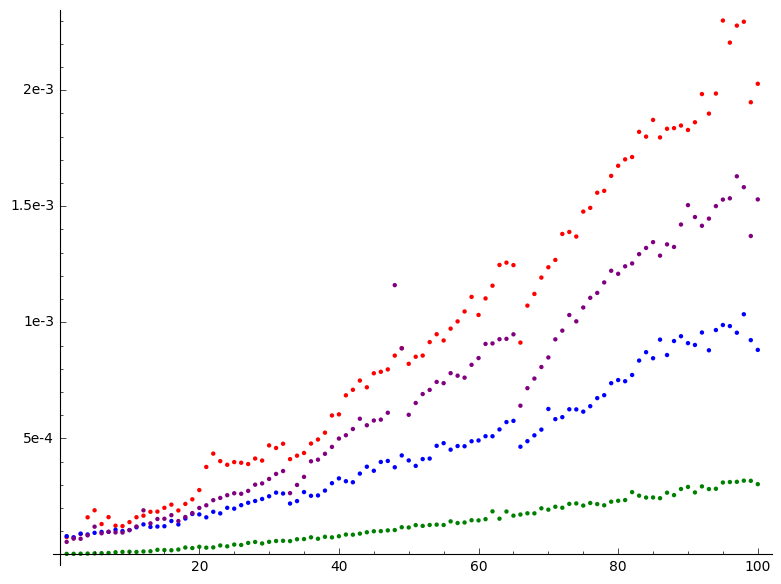

In [293]:
li1+li2+li3+li4